# Lab 6

Import the libraries

In [1]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns


Read the data

In [2]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")
#sns.pairplot(df)

Take some parts of the data frame into a demo

In [3]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()

#sns.pairplot(df_demo)

df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])

Choosing from different clusters

In [4]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_db = sc.fit_transform(X)

bestSil = 1000
nbest = 0
for n in range (2, 11):
    n_clus = n
    labels = KMeans(n_clusters = n_clus).fit_predict(X_db)
    actualSil = metrics.silhouette_score(X_db, labels)
    print('Number of clusters: %d' % n_clus)
    print("Silhouette Coefficient: %0.3f" % actualSil)
    print ("----------------------------------")
    if actualSil < bestSil :
        bestSil = actualSil
        nbest = n
        bestlabels = labels
print("Best Silhouette Coefficient :",bestSil, " with ", nbest, " clusters")

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Number of clusters: 2
Silhouette Coefficient: 0.241
----------------------------------
Number of clusters: 3
Silhouette Coefficient: 0.152
----------------------------------
Number of clusters: 4
Silhouette Coefficient: 0.228
----------------------------------
Number of clusters: 5
Silhouette Coefficient: 0.257
----------------------------------
Number of clusters: 6
Silhouette Coefficient: 0.306
----------------------------------
Number of clusters: 7
Silhouette Coefficient: 0.339
----------------------------------
Number of clusters: 8
Silhouette Coefficient: 0.372
----------------------------------
Number of clusters: 9
Silhouette Coefficient: 0.354
----------------------------------
Number of clusters: 10
Silhouette Coefficient: 0.413
----------------------------------
Best Silhouette Coefficient : 0.1524474998735547  with  3  clusters


Print the clusters with the best Silhouette Coefficient

Number of clusters: 3
Silhouette Coefficient: 0.152


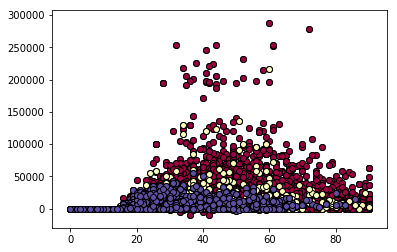

In [5]:
print('Number of clusters: %d' % nbest)

print("Silhouette Coefficient: %0.3f" % bestSil)

unique_labels = set(bestlabels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (bestlabels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')



Agglomerative Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering


bestSilAglo = 1000
nbestAglo = 0
for n in range (2, 11):
    n_clusters = n
    labels = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(X_db)
    actualSil = metrics.silhouette_score(X_db, labels)
    print('Number of clusters: %d' % n_clusters)
    print("Silhouette Coefficient: %0.3f" % actualSil)
    print ("----------------------------------")
    if actualSil < bestSilAglo :
        bestSilAglo = actualSil
        nbestAglo = n
        bestlabelsAglo = labels
print("Best Silhouette Coefficient :",bestSilAglo, " with ", nbestAglo, " clusters")

Number of clusters: 2
Silhouette Coefficient: 0.335
----------------------------------
Number of clusters: 3
Silhouette Coefficient: 0.260
----------------------------------
Number of clusters: 4
Silhouette Coefficient: 0.269
----------------------------------
Number of clusters: 5
Silhouette Coefficient: 0.211
----------------------------------
Number of clusters: 6
Silhouette Coefficient: 0.226
----------------------------------
Number of clusters: 7
Silhouette Coefficient: 0.296
----------------------------------
Number of clusters: 8
Silhouette Coefficient: 0.297
----------------------------------
Number of clusters: 9
Silhouette Coefficient: 0.299
----------------------------------
Number of clusters: 10
Silhouette Coefficient: 0.320
----------------------------------
Best Silhouette Coefficient : 0.21063403831477595  with  5  clusters


Number of clusters: 5
Silhouette Coefficient: 0.211


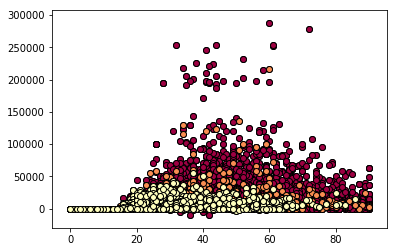

In [11]:
print('Number of clusters: %d' % nbestAglo)

print("Silhouette Coefficient: %0.3f" % bestSilAglo)

unique_labels = set(bestlabelsAglo)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (bestlabels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

Seaborn pointplot

In [15]:
w, h = 11, 9;
Matrix = [[0 for x in range(w)] for y in range(h)] 
#iterations= []

In [16]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

for n in range (2, 11):
    n_clusters = n
    for i in range (0,10):
        print ("n =",n," i =",i)
        ilabels = KMeans(n_clusters = n_clusters).fit_predict(X_db)
        iSil = metrics.silhouette_score(X_db, ilabels)
        Matrix[n-2][i]=iSil

n = 2  i = 0
n = 2  i = 1
n = 2  i = 2
n = 2  i = 3
n = 2  i = 4
n = 2  i = 5
n = 2  i = 6
n = 2  i = 7
n = 2  i = 8
n = 2  i = 9
n = 2  i = 10
n = 3  i = 0
n = 3  i = 1
n = 3  i = 2
n = 3  i = 3
n = 3  i = 4
n = 3  i = 5
n = 3  i = 6
n = 3  i = 7
n = 3  i = 8
n = 3  i = 9
n = 3  i = 10
n = 4  i = 0
n = 4  i = 1
n = 4  i = 2
n = 4  i = 3
n = 4  i = 4
n = 4  i = 5
n = 4  i = 6
n = 4  i = 7
n = 4  i = 8
n = 4  i = 9
n = 4  i = 10
n = 5  i = 0
n = 5  i = 1
n = 5  i = 2
n = 5  i = 3
n = 5  i = 4
n = 5  i = 5
n = 5  i = 6
n = 5  i = 7
n = 5  i = 8
n = 5  i = 9
n = 5  i = 10
n = 6  i = 0
n = 6  i = 1
n = 6  i = 2
n = 6  i = 3
n = 6  i = 4
n = 6  i = 5
n = 6  i = 6
n = 6  i = 7
n = 6  i = 8
n = 6  i = 9
n = 6  i = 10
n = 7  i = 0
n = 7  i = 1
n = 7  i = 2
n = 7  i = 3
n = 7  i = 4
n = 7  i = 5
n = 7  i = 6
n = 7  i = 7
n = 7  i = 8
n = 7  i = 9
n = 7  i = 10
n = 8  i = 0
n = 8  i = 1
n = 8  i = 2
n = 8  i = 3
n = 8  i = 4
n = 8  i = 5
n = 8  i = 6
n = 8  i = 7
n = 8  i = 8
n = 8  i = 9
n = 8 

In [18]:
print (Matrix)

[[0.13225631017575484, 0.24121162813825572, 0.3866599867043679, 0.13086910755552944, 0.3866599867043679, 0.3866599867043679, 0.12782959282811526, 0.24121162813825572, 0.3866599867043679, 0.3866599867043679, 0.24121162813825572], [0.2604621996629984, 0.15716026186101448, 0.26628096390014555, 0.25615684449726134, 0.2655601860629636, 0.1720113537748063, 0.17236234677058737, 0.1578346952391843, 0.2655601860629636, 0.15064104382778765, 0.14004811158123984], [0.19489388342665664, 0.2706815288794878, 0.1888668757981393, 0.19627367348926014, 0.1888847290918596, 0.17094546065764363, 0.2536140916966445, 0.28649171665036727, 0.20510987025568062, 0.18068404343475009, 0.2029376622696527], [0.32398723262672247, 0.19845660205706994, 0.23205396397109807, 0.218590342003976, 0.2865782264027901, 0.3086204778691752, 0.30747039110879876, 0.1743359859977794, 0.21419693508012028, 0.22482136287141807, 0.21211942859961144], [0.25349724064182155, 0.3569723665742992, 0.24765660733121223, 0.23692294545708534, 0.2

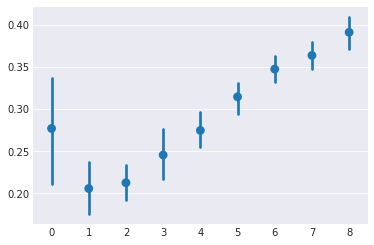

In [31]:
sns.set_style("darkgrid")
ax = sns.pointplot(data = Matrix, join = False)